In [1]:
# Random Forest Classification for Recipe Reviews and User Feedback Dataset

# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Step 2: Load the dataset
df = pd.read_csv("RecipeReviewsandUserFeedbackDataset.csv")





In [3]:
# Step 3: Data Exploration and Preprocessing
print(df.head())
print(df.info())
# Drop unnecessary columns (unique IDs and comment text for initial classification)
df.drop(['recipe_code', 'comment_id', 'user_id', 'user_name', 'text'], axis=1, inplace=True)


# Handle missing values (impute numerical values)

imputer = SimpleImputer(strategy='mean')
df['user_reputation'] = imputer.fit_transform(df[['user_reputation']])

# Convert categorical variables using Label Encoding
label_encoder = LabelEncoder()
df['recipe_name'] = label_encoder.fit_transform(df['recipe_name'])

# Define the target and features
X = df.drop('stars', axis=1)
y = df['stars']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Unnamed: 0  recipe_number  recipe_code         recipe_name  \
0           0              1        14299  Creamy White Chili   
1           1              1        14299  Creamy White Chili   
2           2              1        14299  Creamy White Chili   
3           3              1        14299  Creamy White Chili   
4           4              1        14299  Creamy White Chili   

                                        comment_id         user_id  \
0  sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM  u_9iFLIhMa8QaG   
1  sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY  u_Lu6p25tmE77j   
2  sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP  u_s0LwgpZ8Jsqq   
3  sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC  u_fqrybAdYjgjG   
4  sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI  u_XXWKwVhKZD69   

    user_name  user_reputation  created_at  reply_count  thumbs_up  \
0     Jeri326                1  1665619889            0          0   
1     Mark467               50  1665277687      

In [4]:

# Step 4: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# Step 5: Make predictions
y_pred = rf_classifier.predict(X_test)



Accuracy: 0.7341215287324718
              precision    recall  f1-score   support

           0       0.41      0.23      0.29       340
           1       0.28      0.24      0.26        46
           2       0.00      0.00      0.00        44
           3       0.12      0.04      0.06        98
           4       0.16      0.07      0.10       321
           5       0.80      0.92      0.85      2788

    accuracy                           0.73      3637
   macro avg       0.29      0.25      0.26      3637
weighted avg       0.67      0.73      0.69      3637



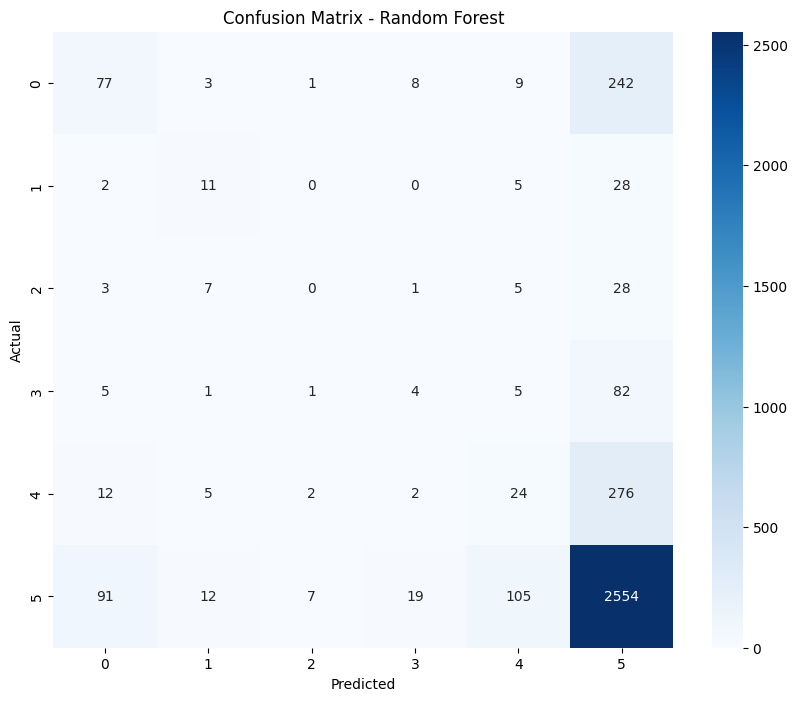

In [6]:
# Step 6: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()



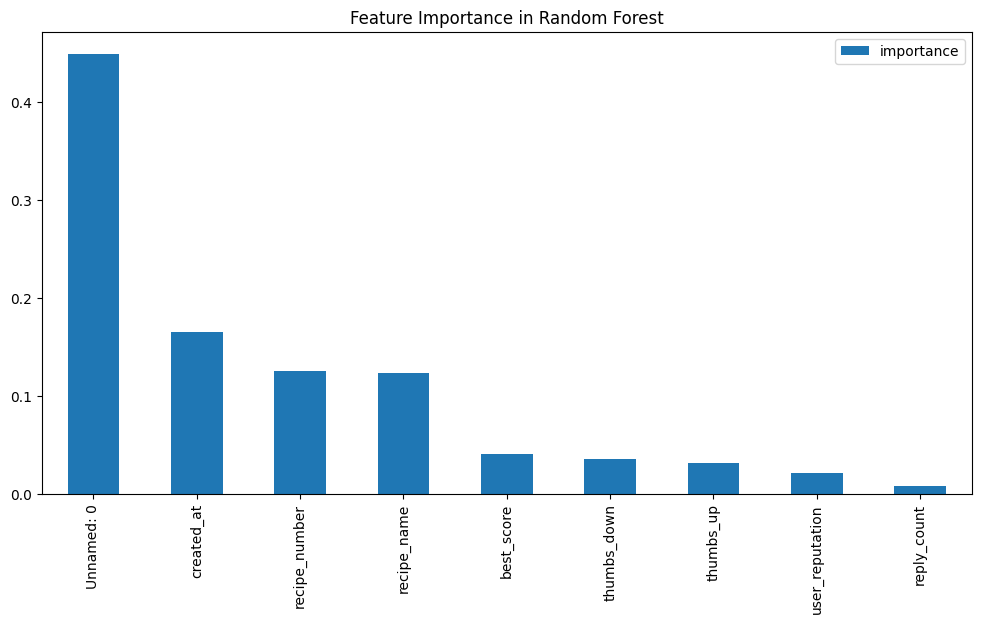

In [7]:
# Step 7: Feature Importance
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance in Random Forest')
plt.show()